https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import io
%cd "C:\Users\91866\Desktop\github_dataset\House Price Predictions"

C:\Users\91866\Desktop\github_dataset\House Price Predictions


In [3]:
housetrain=pd.read_csv("train.csv")

In [4]:
housetest=pd.read_csv("test.csv")

In [5]:
print(housetrain.shape)
print(housetest.shape)

(1460, 81)
(1459, 80)


In [6]:
housetrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
housetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
housetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
housetrain.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
# Adding dependant variable temporarily to test data.
housetest['SalePrice']='test'

In [11]:
# Conacatening train and test data for preprocessing.row wies concatenation so axis=0.
combinedf=pd.concat([housetrain,housetest],axis=0)

In [12]:
combinedf.shape

(2919, 81)

In [13]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Exploratory Data Analysis

In [14]:
# if large/complete no of column missing value .
pd.set_option("display.max_rows",82)
combinedf.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
Utilities           2
BsmtHalfBath        2
BsmtFullBath        2
GarageArea          1
BsmtFinSF1          1
SaleType            1
GarageCars          1
BsmtUnfSF           1
Electrical          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
TotalBsmtSF         1
BsmtFinSF2          1
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

<AxesSubplot: >

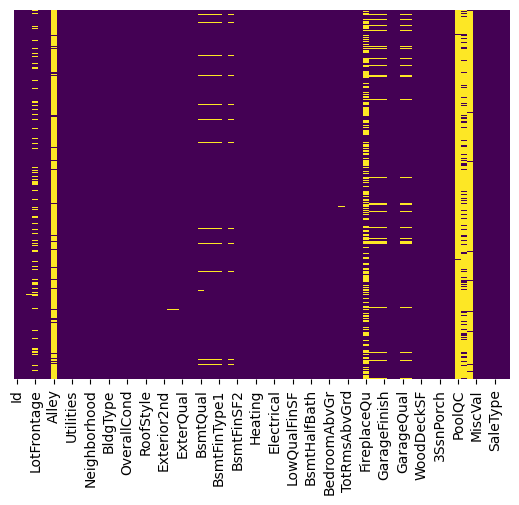

In [15]:
sns.heatmap(combinedf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
# Split data into objectcols and numericals
objectcols=combinedf.select_dtypes(include=['object'])
numariccols=combinedf.select_dtypes(include=np.number)

In [17]:
print(objectcols.shape)
print(numariccols.shape)

(2919, 44)
(2919, 37)


In [18]:
objectcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [19]:
notavailablecols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']

In [20]:
for col in notavailablecols:
    objectcols[col]=objectcols[col].fillna("NotAvailable")

In [21]:
garage_list=[col for col in objectcols if col.startswith('Gar')]
garage_list

['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [22]:
for col in garage_list:
    freq=objectcols[col].value_counts(dropna=False)
    print(freq)

Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64
Unf    1230
RFn     811
Fin     719
NaN     159
Name: GarageFinish, dtype: int64
TA     2604
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64
TA     2654
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64


In [23]:
Bsmt_list=[col for col in objectcols if col.startswith('Bsmt')]
Bsmt_list

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [24]:
for col in Bsmt_list:
    freq=objectcols[col].value_counts(dropna=False)
    print(freq)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64
TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64
No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [25]:
# Most frequent imputation for all remaing variable in object call.
for col in objectcols.columns:
    objectcols[col]=objectcols[col].fillna(objectcols[col].value_counts().idxmax())

In [26]:
numariccols.isnull().sum().sort_values(ascending=False)
# within numaric variable ,there might be categorical variable
#Categorical variable must be seperated from numaric variable
# categorical variable like year,rating,dummyencoded(0/1),etc

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [27]:
numariccols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [28]:

categorycols=numariccols[['OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']]

In [29]:
numariccols=numariccols.drop(['OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold'],axis=1)

In [30]:
print(categorycols.shape)
print(numariccols.shape)

(2919, 7)
(2919, 30)


In [31]:
categorycols.isnull().sum().sort_values(ascending=False)

GarageYrBlt     159
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MoSold            0
YrSold            0
dtype: int64

In [32]:
categorycols.GarageYrBlt=categorycols.GarageYrBlt.fillna(categorycols.GarageYrBlt.value_counts().idxmax())

In [33]:
# Median imputation for Numaric cols

for col in numariccols.columns:
    numariccols[col]=numariccols[col].fillna(numariccols[col].median())

Encoding and Model Building

In [34]:
# Lable Encoding or Dummy Encoding objectcols and categorical
# we cant have column greture tha  rows so not going with dummy encoder

from sklearn.preprocessing import LabelEncoder

In [35]:
#Any Mix datatype bydefault goes into object
#lable will not workl for mix datatype
numariccols['SalePrice']=objectcols.SalePrice

In [36]:
objectcols=objectcols.drop('SalePrice',axis=1)

In [37]:
le=LabelEncoder()

In [38]:
objectcols_encode=objectcols.apply(le.fit_transform)

In [39]:
categorycols_encode=categorycols.apply(le.fit_transform)

In [40]:
objectcols_encode.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,1,8,4


In [41]:
numariccols.drop('SalePrice',axis=1).corr()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
Id,1.000000,0.008931,-0.024710,-0.040746,-0.026737,-0.016988,0.018170,-0.014509,-0.024960,-0.008678,...,-0.035236,-0.010066,-0.008847,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244
MSSubClass,0.008931,1.000000,-0.389469,-0.201730,0.006309,-0.064254,-0.072431,-0.125913,-0.219893,-0.248641,...,-0.055151,-0.046564,-0.103389,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867
LotFrontage,-0.024710,-0.389469,1.000000,0.361426,0.200474,0.201697,0.040330,0.106921,0.330765,0.423217,...,0.231731,0.290631,0.338014,0.104364,0.151789,0.011039,0.024882,0.069352,0.161025,0.035161
LotArea,-0.040746,-0.201730,0.361426,1.000000,0.124728,0.194050,0.084107,0.021400,0.254150,0.332460,...,0.261185,0.180415,0.213249,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029
MasVnrArea,-0.026737,0.006309,0.200474,0.124728,1.000000,0.301427,-0.014580,0.087991,0.393662,0.392367,...,0.273129,0.357659,0.370945,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156
BsmtFinSF1,-0.016988,-0.064254,0.201697,0.194050,0.301427,1.000000,-0.055028,-0.477387,0.536471,0.458091,...,0.293095,0.255510,0.310454,0.223511,0.124191,-0.099690,0.050914,0.096837,0.084465,0.093300
BsmtFinSF2,0.018170,-0.072431,0.040330,0.084107,-0.014580,-0.055028,1.000000,-0.238215,0.089423,0.084389,...,0.065707,-0.014753,0.003225,0.098462,-0.005805,0.032775,-0.023268,0.063329,0.044530,-0.005130
BsmtUnfSF,-0.014509,-0.125913,0.106921,0.021400,0.087991,-0.477387,-0.238215,1.000000,0.412291,0.296623,...,0.004881,0.180067,0.164435,-0.039244,0.119804,0.005032,-0.005803,-0.049136,-0.032268,-0.010486
TotalBsmtSF,-0.024960,-0.219893,0.330765,0.254150,0.393662,0.536471,0.089423,0.412291,1.000000,0.801638,...,0.332948,0.437900,0.486021,0.229614,0.245533,-0.085490,0.037897,0.075376,0.072219,0.084005
1stFlrSF,-0.008678,-0.248641,0.423217,0.332460,0.392367,0.458091,0.084389,0.296623,0.801638,1.000000,...,0.407545,0.440452,0.491979,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062


In [42]:
import seaborn as sns

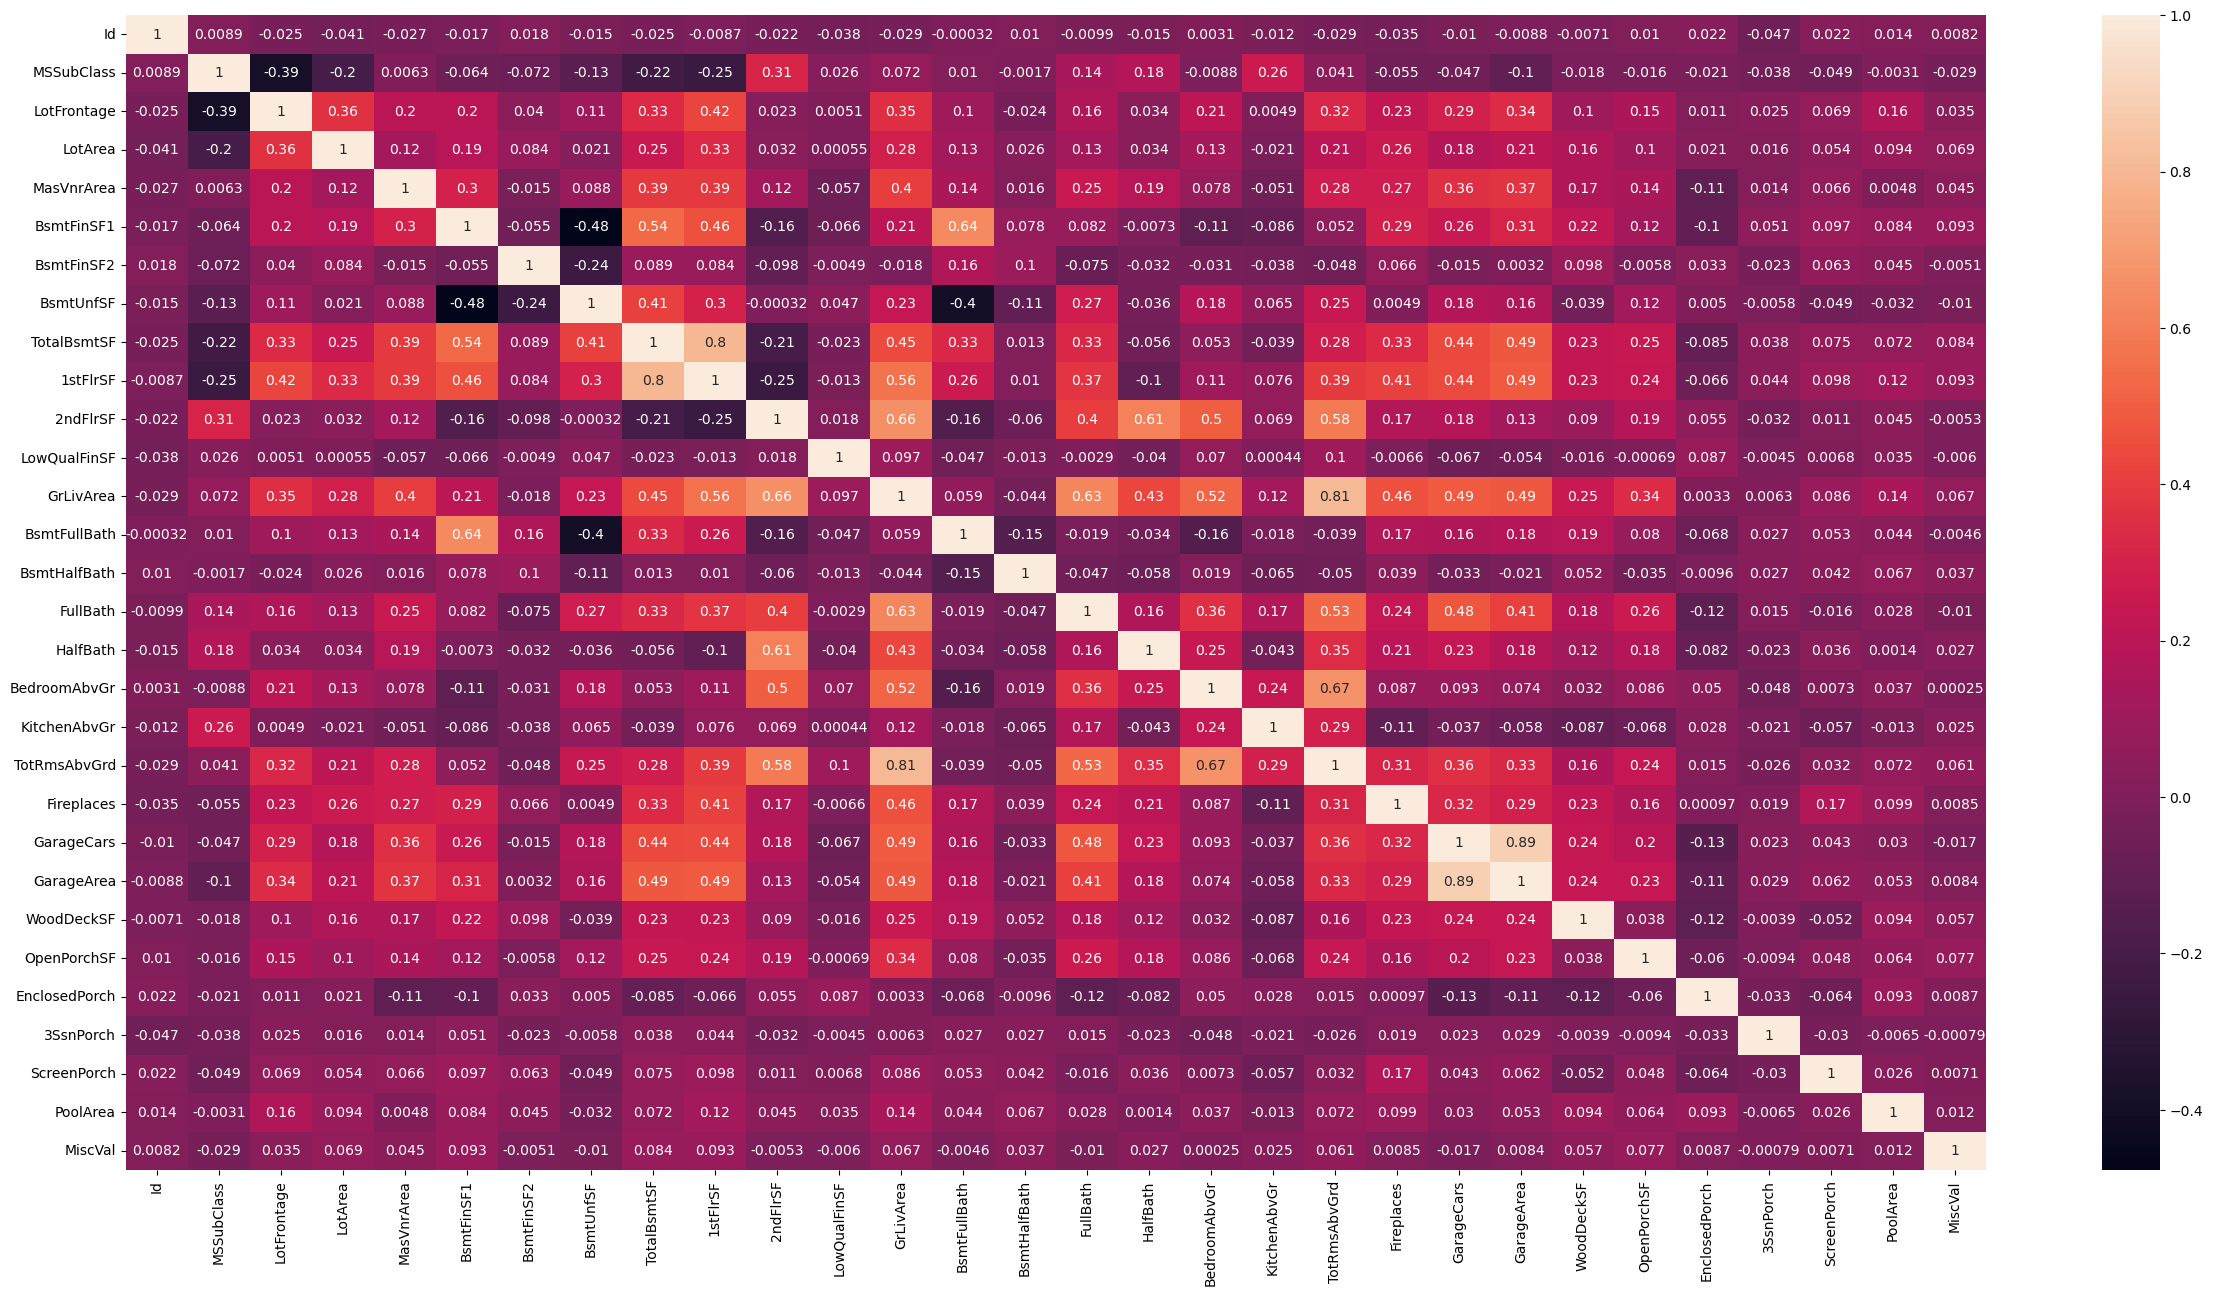

In [43]:
plt.figure(figsize=(30,15))
sns.heatmap(numariccols.drop('SalePrice',axis=1).corr(),annot=True)
plt.show()

In [44]:
numariccols.head()
# scling must eb done because data in mulitple datatypes

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,60,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,...,2.0,548.0,0,61,0,0,0,0,0,208500
1,2,20,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,...,2.0,460.0,298,0,0,0,0,0,0,181500
2,3,60,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,...,2.0,608.0,0,42,0,0,0,0,0,223500
3,4,70,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,...,3.0,642.0,0,35,272,0,0,0,0,140000
4,5,60,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,...,3.0,836.0,192,84,0,0,0,0,0,250000


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()

In [47]:
numariccols_scaled=scaler.fit_transform(numariccols.drop('SalePrice',axis=1))

In [48]:
numariccols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [49]:
numariccols_scaled=pd.DataFrame(numariccols_scaled,columns=['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'])

# SalePrice is not putting here
# or we can put columns[0:30] insted of putting all names

In [50]:
 # First we have to reset index for all cols
numariccols_scaled=numariccols_scaled.reset_index()

In [51]:
objectcols_encode=objectcols_encode.reset_index()

In [52]:
categorycols_encode=categorycols_encode.reset_index()

In [53]:
combinedf_clean=pd.concat([numariccols_scaled,objectcols_encode,categorycols_encode],axis=1)

In [54]:
numariccols=numariccols.reset_index()

In [55]:
combinedf_clean['SalePrice']=numariccols.SalePrice

In [56]:
housetrain_df=combinedf_clean[combinedf_clean.SalePrice!='test']
housetest_df=combinedf_clean[combinedf_clean.SalePrice=='test']

In [57]:
housetest_df=housetest_df.drop('SalePrice',axis=1)

In [58]:
# Split data in y and X
y=housetrain_df.SalePrice
X=housetrain_df.drop(['Id','SalePrice','index'],axis=1)

In [59]:
housetest_df=housetest_df.drop(['Id','index'],axis=1)

In [60]:
y=y.astype('int64')

<AxesSubplot: ylabel='Frequency'>

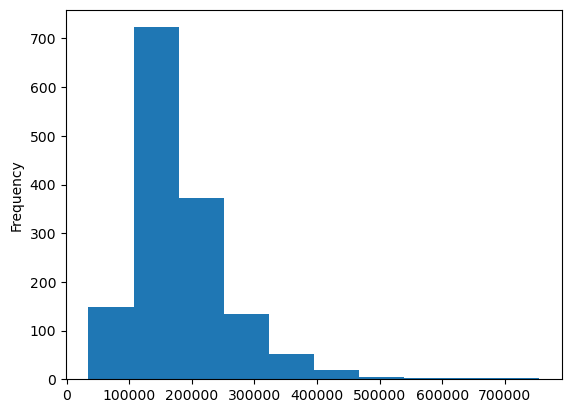

In [61]:
# Histogram,Boxplot and Density Curve for y
y.plot(kind='hist')

<AxesSubplot: >

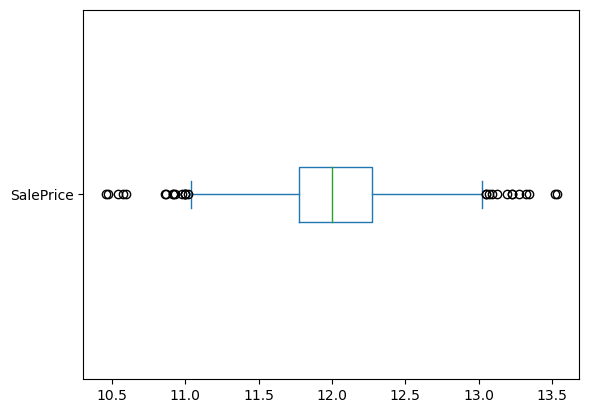

In [62]:
np.log(y).plot(kind='box',vert=False)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg=LinearRegression()

In [65]:
regmodel=reg.fit(X,y)

In [66]:
regmodel.score(X,y)
# R Sqaure value
#t should be between 0.60-0.95 
#  if not in between  the model will be underfitting or overfitting

0.8544531061204118

In [67]:
regmodel.intercept_

364375.19908902864

In [68]:
# Predict
regpredict=regmodel.predict(X)
regpredict

array([216899.05502804, 199808.50644654, 218453.50205413, ...,
       243066.81422413, 149232.12382877, 161479.81065575])

In [69]:
# Residual
regresid=y-regpredict
regresid

0       -8399.055028
1      -18308.506447
2        5046.497946
3      -33673.066728
4      -35841.575236
            ...     
1455     5170.125118
1456   -10990.075861
1457    23433.185776
1458    -7107.123829
1459   -13979.810656
Name: SalePrice, Length: 1460, dtype: float64

In [70]:
np.sqrt(np.mean(regresid**2))

30297.41719937248